In [109]:
from google.colab import drive;
drive.mount("/content/drive");

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [111]:
df = pd.read_csv("/content/drive/MyDrive/SoftComputing_Assignments_Dataset/Dataset 3.csv" , encoding = "ISO-8859-1");
print(df.head(20));

                                               tweets  sentiment
0   just had a real good moment. i missssssssss hi...          0
1          is reading manga  http://plurk.com/p/mzp1e          0
2   @comeagainjen http://twitpic.com/2y2lx - http:...          0
3   @lapcat Need to send 'em to my accountant tomo...          0
4       ADD ME ON MYSPACE!!!  myspace.com/LookThunder          0
5               so sleepy. good times tonight though           0
6   @SilkCharm re: #nbn as someone already said, d...          0
7               23 or 24Ã¯Â¿Â½C possible today. Nice           0
8         nite twitterville  workout in the am  -ciao          0
9     @daNanner Night, darlin'!  Sweet dreams to you           0
10                           Good morning everybody!           0
11  Finally! I just created my WordPress Blog. The...          0
12  kisha they cnt get over u til they get out frm...          0
13  @nicolerichie Yes i remember that band, It was...          0
14             I really l

In [112]:
print(len(df));

10314


0    8000
1    2314
Name: sentiment, dtype: int64
[0.77564475 0.22435525]
[0.2243552452976537, 0.7756447547023463]
['0', '1']
0    8000
1    2314
Name: sentiment, dtype: int64


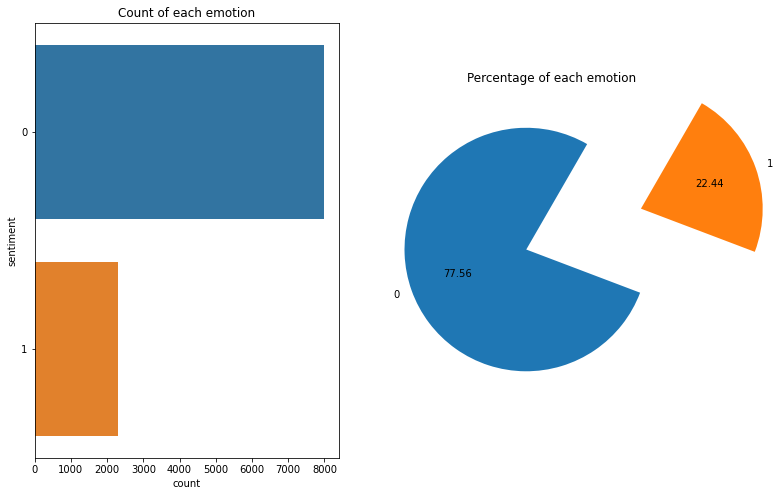

In [113]:
col = 'sentiment'

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
print(df[col].dropna().value_counts());
print((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts()))));
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])
print(explode);
labels = ['0','1'];
print(labels);
sizes = df[col].value_counts()
print(sizes)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%.2f')
ax2.add_artist(plt.Circle((5,5),0.7,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

In [114]:
df['char_length'] = df['tweets'].apply(lambda x : len(x))
df['token_length'] = df['tweets'].apply(lambda x : len(x.split(" ")))
print(df);

                                                  tweets  ...  token_length
0      just had a real good moment. i missssssssss hi...  ...            12
1             is reading manga  http://plurk.com/p/mzp1e  ...             5
2      @comeagainjen http://twitpic.com/2y2lx - http:...  ...             5
3      @lapcat Need to send 'em to my accountant tomo...  ...            23
4          ADD ME ON MYSPACE!!!  myspace.com/LookThunder  ...             6
...                                                  ...  ...           ...
10309  No Depression by G Herbo is my mood from now o...  ...            20
10310  What do you do when depression succumbs the br...  ...            18
10311  Ketamine Nasal Spray Shows Promise Against Dep...  ...            10
10312  dont mistake a bad day with depression! everyo...  ...            10
10313                                                  0  ...             1

[10314 rows x 4 columns]


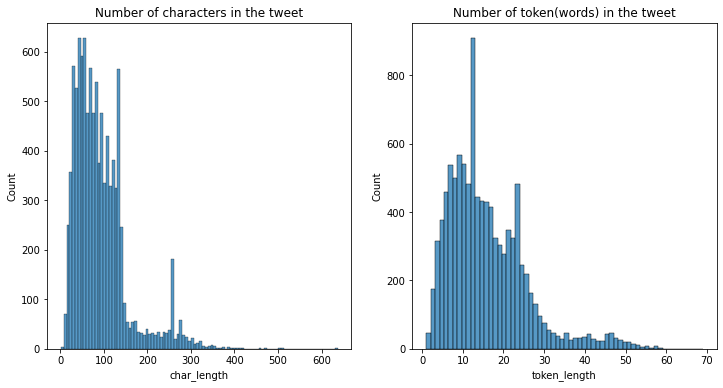

In [115]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.histplot(df['char_length'], ax=ax1)
sns.histplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

**Data** **Preprocessing**

In [116]:
!pip install inflect

In [117]:
!pip install contractions

In [118]:
!pip install bs4

In [119]:
from sklearn.preprocessing import LabelEncoder;
from sklearn.model_selection import train_test_split;
import nltk;
import inflect;
import contractions;
from bs4 import BeautifulSoup;
import re, string, unicodedata;
from nltk import word_tokenize, sent_tokenize;
from nltk.corpus import stopwords;
from nltk.stem import LancasterStemmer, WordNetLemmatizer;
nltk.download('punkt');
nltk.download('stopwords');
nltk.download('wordnet');

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [120]:

def text_preprocessing_platform(df, text_col, remove_stopwords=False):
    
    ## Define functions for individual steps
    # First function is used to denoise text
    def denoise_text(text):

        # Strip html if any. For ex. removing <html>, <p> tags
        soup = BeautifulSoup(text, "html.parser");
        text = soup.get_text();
        # Replace contractions in the text. For ex. didn't -> did not
        text = contractions.fix(text);
        return text;
    
    ## Next step is text-normalization
    
    # Text normalization includes many steps.
    
    # Each function below serves a step.
    
    
    def remove_non_ascii(words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = [];
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore');
            new_words.append(new_word);
        return new_words;
    
    
    def to_lowercase(words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = [];
        for word in words:
            new_word = word.lower();
            new_words.append(new_word);
        return new_words;
    
    
    def remove_punctuation(words):
        """Remove punctuation from list of tokenized words"""
        new_words = [];
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word);
            if new_word != '':
                new_words.append(new_word);
        return new_words;
    
    
    def replace_numbers(words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine();
        new_words = [];
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word);
                new_words.append(new_word);
            else:
                new_words.append(word);
        return new_words;
    
    
    def remove_stopwords(words):
        """Remove stop words from list of tokenized words"""
        new_words = [];
        for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word);
        return new_words;
    
    
    def stem_words(words):
        """Stem words in list of tokenized words"""
        stemmer = LancasterStemmer();
        stems = [];
        for word in words:
            stem = stemmer.stem(word);
            stems.append(stem);
        return stems;
    
    
    def lemmatize_verbs(words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer();
        lemmas = [];
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v');
            lemmas.append(lemma);
        return lemmas;
    
    
    ### A wrap-up function for normalization
    def normalize_text(words, remove_stopwords):
        words = remove_non_ascii(words);
        words = to_lowercase(words);
        words = remove_punctuation(words);
        words = replace_numbers(words);
        if remove_stopwords:
            words = remove_stopwords(words);
        words = stem_words(words)
        # words = lemmatize_verbs(words);
        return words;
    
    # All above functions work on word tokens we need a tokenizer
    
    # Tokenize tweet into words
    def tokenize(text):
        return nltk.word_tokenize(text);
    
    
    # A overall wrap-up function
    def text_prepare(text):
        text = denoise_text(text);
        text = ' '.join([x for x in normalize_text(tokenize(text), remove_stopwords)]);
        return text;
    
    # run every-step
    df[text_col] = [text_prepare(x) for x in df[text_col]];
    print(text_col)
    
    # return processed df
    return df;

Before Text Preprocessing


,tweets
0,just had a real good moment. i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e
2,@comeagainjen http://twitpic.com/2y2lx - http:...
3,@lapcat Need to send 'em to my accountant tomo...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder


(10314, 4)
                                                tweets  ...  token_length
340  Ever since I bought my Macbook, I send much mo...  ...            21

[1 rows x 4 columns]


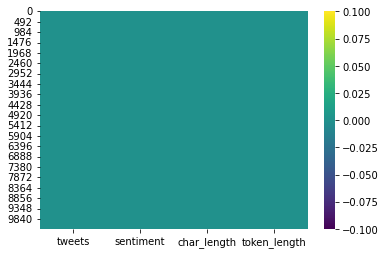

tweets
After Text Preprocessing


,tweets
0,real good mom missssssssss much
1,read mang http plurkcompmzp1e
2,comeagaind http twitpiccom2y2lx http wwwyoutub...
3,lapc nee send account tomorrow od ev refer tax...
4,ad myspac myspacecomlookthund


(10314, 4)
                                                tweets  ...  token_length
340  ev sint bought macbook send much email fuck ea...  ...            21

[1 rows x 4 columns]


In [121]:
print("Before Text Preprocessing")
display(df.head()[['tweets']])
print(df.shape);
print(df.loc[[340]])
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()
processed_df = text_preprocessing_platform(df, 'tweets', remove_stopwords=False)
print("After Text Preprocessing")
display(processed_df.head()[['tweets']])
print(processed_df.shape);
print(processed_df.loc[[340]]);

processed_df.to_csv('After_cleaning.csv');

In [122]:
 processed_df.head()

,tweets,sentiment,char_length,token_length
0,real good mom missssssssss much,0,57,12
1,read mang http plurkcompmzp1e,0,42,5
2,comeagaind http twitpiccom2y2lx http wwwyoutub...,0,84,5
3,lapc nee send account tomorrow od ev refer tax...,0,135,23
4,ad myspac myspacecomlookthund,0,45,6


In [16]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2021-09-27 08:26:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-09-27 08:26:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-09-27 08:26:24--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [123]:
f = open("glove.6B.50d.txt");

In [124]:
import tensorflow as tf
from keras.layers import Dropout, Dense, GRU, Embedding, LSTM, Bidirectional, TimeDistributed, Flatten;
from keras.models import Sequential;
from sklearn.feature_extraction.text import TfidfVectorizer;
from sklearn.metrics import matthews_corrcoef, confusion_matrix;
from sklearn import metrics;
from sklearn.utils import shuffle;
from keras.preprocessing.text import Tokenizer;
from keras.preprocessing.sequence import pad_sequences;
from sklearn.preprocessing import LabelEncoder;

# Logging
import logging;
logging.basicConfig(level=logging.INFO);

import warnings


In [125]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dense
from keras.layers import Dropout, Dense, Embedding, Conv1D,MaxPool1D,Flatten;
from keras.models import Sequential;
from sklearn.feature_extraction.text import TfidfVectorizer;
from sklearn.metrics import matthews_corrcoef,confusion_matrix;
from sklearn import metrics;
from sklearn.utils import shuffle;
from keras.preprocessing.text import Tokenizer;
from keras.preprocessing.sequence import pad_sequences;
from sklearn.preprocessing import LabelEncoder;

# Logging
import logging;
logging.basicConfig(level=logging.INFO);

import warnings


In [158]:
def loadData_Tokenizer(X_train, X_test,MAX_NB_WORDS=75000,MAX_SEQUENCE_LENGTH=500):
    text = np.concatenate((X_train, X_test),axis = 0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open("glove.6B.50d.txt", encoding='ISO-8859-1')
    for line in f:
        try:
            values = line.split()
            word = values[0]
            try:
                coefs = np.asarray(values[1:], dtype='float32')
            except:
                pass
            embeddings_index[word] = coefs
        except UnicodeDecodeError:
            pass
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index, tokenizer)

In [159]:
def Build_Model_CNN_Text(word_index, embeddings_index,MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
     
      embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
      for word, i in word_index.items():
          embedding_vector = embeddings_index.get(word)
          if embedding_vector is not None:
              # words not found in embedding index will be all-zeros.
              if len(embedding_matrix[i]) != len(embedding_vector):
                  print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                        "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                  " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                  exit(1)
              embedding_matrix[i] = embedding_vector
      model=Sequential()
      model.add(Embedding(len(word_index) + 1,
                                  EMBEDDING_DIM,
                                  weights=[embedding_matrix],
                                  input_length=MAX_SEQUENCE_LENGTH,
                                  trainable=False))
      
      model.add(Conv1D(64,3,activation='relu'))
      model.add(MaxPool1D(2))
      model.add(Dropout(dropout))
      

      model.add(Conv1D(32,3,activation='relu'))
      model.add(Dropout(dropout))
      
       
      model.add(Conv1D(16,3,activation='relu'))
      model.add(tf.keras.layers.GlobalMaxPooling1D())
      
      model.add(Dense(1,activation='sigmoid'))
      model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
       
      return model

In [160]:
train_final = processed_df[['tweets', 'sentiment']]
print("Train DataFrame")
display(train_final.head(3))

Train DataFrame


,tweets,sentiment
0,real good mom missssssssss much,0
1,read mang http plurkcompmzp1e,0
2,comeagaind http twitpiccom2y2lx http wwwyoutub...,0


In [161]:
preprocess = True
text = 'tweets'
target = 'sentiment'
MAX_SEQUENCE_LENGTH = 60

In [162]:
X = df[text]
y = df[target]

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [165]:
print("Generating Glove Embeddings...")
X_train_Glove,X_test_Glove, word_index,embeddings_index, tokenizer = loadData_Tokenizer(X_train,X_test, MAX_SEQUENCE_LENGTH=MAX_SEQUENCE_LENGTH)

Generating Glove Embeddings...
Found 17933 unique tokens.
(10314, 60)
Total 399955 word vectors.


In [166]:

# Model Training
with warnings.catch_warnings():
    print("Building Model ...")
    model_CNN = Build_Model_CNN_Text(word_index,embeddings_index)
    model_CNN.summary()
    print("\n Starting Training ... \n")
    history = model_CNN.fit(X_train_Glove, y_train,
                              validation_data=(X_test_Glove, y_test),
                              epochs=10,
                              batch_size=256,
                              verbose=2)
    warnings.simplefilter("ignore")

Building Model ...
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 500, 50)           896700    
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 498, 64)           9664      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 249, 64)           0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 249, 64)           0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 247, 32)           6176      
_________________________________________________________________
dropout_27 (Dropout)         (None, 247, 32)           0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None

29/29 - 1s - loss: 0.4950 - accuracy: 0.7937 - val_loss: 0.5492 - val_accuracy: 0.7658
Epoch 2/10
29/29 - 0s - loss: 0.4078 - accuracy: 0.8436 - val_loss: 0.4660 - val_accuracy: 0.8142
Epoch 3/10
29/29 - 0s - loss: 0.2893 - accuracy: 0.8962 - val_loss: 0.3528 - val_accuracy: 0.9173
Epoch 4/10
29/29 - 0s - loss: 0.1789 - accuracy: 0.9388 - val_loss: 0.2478 - val_accuracy: 0.9551
Epoch 5/10
29/29 - 0s - loss: 0.1221 - accuracy: 0.9597 - val_loss: 0.2057 - val_accuracy: 0.9667
Epoch 6/10
29/29 - 0s - loss: 0.0920 - accuracy: 0.9719 - val_loss: 0.1716 - val_accuracy: 0.9735
Epoch 7/10
29/29 - 0s - loss: 0.0776 - accuracy: 0.9769 - val_loss: 0.1453 - val_accuracy: 0.9758
Epoch 8/10
29/29 - 0s - loss: 0.0723 - accuracy: 0.9798 - val_loss: 0.1624 - val_accuracy: 0.9719
Epoch 9/10
29/29 - 0s - loss: 0.0679 - accuracy: 0.9813 - val_loss: 0.1578 - val_accuracy: 0.9712
Epoch 10/10
29/29 - 0s - loss: 0.0615 - accuracy: 0.9832 - val_loss: 0.1734 - val_accuracy: 0.9693


In [167]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


 Plotting results ... 



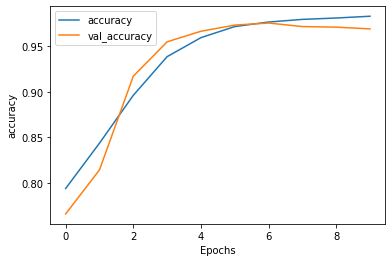

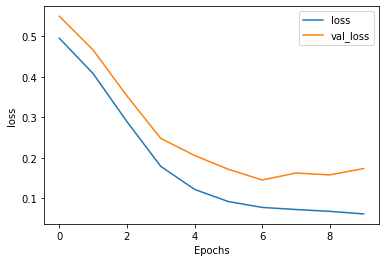

In [168]:
print("\n Plotting results ... \n")
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [169]:
predict_x=model_CNN.predict(X_test_Glove); 
classes_x=np.argmax(predict_x,axis=1)

In [170]:
print(metrics.classification_report(y_test, classes_x));

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2376
           1       0.00      0.00      0.00       719

    accuracy                           0.77      3095
   macro avg       0.38      0.50      0.43      3095
weighted avg       0.59      0.77      0.67      3095



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,classes_x))
cnf_matrix = confusion_matrix(y_test,classes_x);
labels = ['0','1'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[2376    0]
 [ 719    0]]


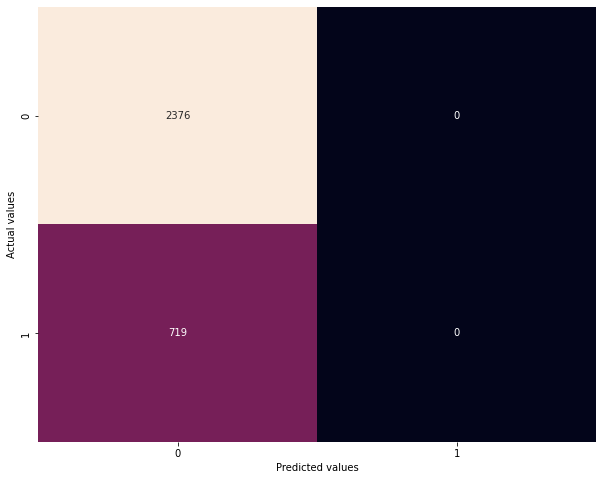

In [172]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()